# Sharpe

### About Sharpe
The Sharpe Ratio is a method to evaluate an asset's return in relation to it's risk. It is doing so by dividing the "exess return" by it's standard deviation. The "exess return" is the difference of the average return to the one of a "risk free" asses (such as US Government Bonds).

<img src="https://www.myaccountingcourse.com/wp-content/uploads/2017/10/sharpe-ratio-formula.jpg" width="750">

The below chart illustrates an example.

<img src="http://www.marottaonmoney.com/wp-content/uploads/2017/09/chile-sharpe.jpg" width="750">


### Objective
The goal is to make use of the Sharpe Ratio to improve the balace of a portfolio.
General guiding principles:
- The higher the Sharpe ratio, the better
- Rule of thumb: Sharpe Ratio < 0 => Not a good investment
- Rule of thumb: Sharpe Ratio >= 0 < 1 => Potentially a good investment
- Rule of thumb: Sharpe Ratio >= 1 => A good investment


### Approach
1. Import libraries
2. Data and data preparation
3. Exploratory data analysis
4. Calculating the Sharpe Ratio
5. Using Sharpe Ratio for portfolio balancing

## 1. Importing Libraries

In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Data

In [2]:
tickers = ['XIC.TO', '^GSPC', 'SHOP', 'TSLA', 'VFV.TO', 'VDY.TO', 'HXQ.TO', 'XMH.TO', 'ZFL.TO']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'HXQ.TO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,XMH.TO,ZFL.TO,HXQ.TO
Date,,,,,,,,,
2018-12-31,20.929352,2506.850098,138.449997,66.559998,58.090958,26.368475,15.532483,15.984078,NaN
2019-01-02,20.938534,2510.030029,137.600006,62.023998,58.119770,26.553055,15.571314,16.131475,NaN
2019-01-03,20.727314,2447.889893,129.789993,60.071999,56.198448,26.403641,15.425696,16.352581,NaN
2019-01-04,21.067104,2531.939941,138.059998,63.537998,57.821964,26.764004,15.920794,16.168329,NaN
2019-01-07,21.168123,2549.689941,144.389999,66.991997,57.783543,26.834324,16.076118,16.094637,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.939999,NaN,NaN,NaN,107.730003,43.009998,26.020000,17.817001,NaN
2021-12-27,NaN,4791.189941,1400.589966,1093.939941,NaN,NaN,NaN,NaN,NaN
2021-12-28,NaN,4786.350098,1375.619995,1088.469971,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO     16
^GSPC      13
SHOP       13
TSLA       13
VFV.TO     16
VDY.TO     16
XMH.TO     16
ZFL.TO     16
HXQ.TO    770
dtype: int64

In [4]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [5]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,XMH.TO,ZFL.TO,HXQ.TO
Date,,,,,,,,,
2018-12-31,20.929352,2506.850098,138.449997,66.559998,58.090958,26.368475,15.532483,15.984078,NaN
2019-01-02,20.938534,2510.030029,137.600006,62.023998,58.119770,26.553055,15.571314,16.131475,NaN
2019-01-03,20.727314,2447.889893,129.789993,60.071999,56.198448,26.403641,15.425696,16.352581,NaN
2019-01-04,21.067104,2531.939941,138.059998,63.537998,57.821964,26.764004,15.920794,16.168329,NaN
2019-01-07,21.168123,2549.689941,144.389999,66.991997,57.783543,26.834324,16.076118,16.094637,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.939999,4725.790039,1439.329956,1067.000000,107.730003,43.009998,26.020000,17.817001,NaN
2021-12-27,33.939999,4791.189941,1400.589966,1093.939941,107.730003,43.009998,26.020000,17.817001,NaN
2021-12-28,33.939999,4786.350098,1375.619995,1088.469971,107.730003,43.009998,26.020000,17.817001,NaN


In [6]:
df_stocks.describe()

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,XMH.TO,ZFL.TO,HXQ.TO
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,0.0
mean,26.681492,3466.701412,810.497832,374.454381,78.775084,32.605231,20.089156,18.002644,NaN
std,3.728949,639.484719,474.751971,331.232835,13.096519,4.960491,3.659743,1.156823,NaN
min,17.018467,2237.399902,129.789993,35.793999,56.198448,20.558218,10.966601,15.845882,NaN
25%,24.155900,2934.704956,329.677505,62.473501,67.628769,29.134976,17.669712,17.142758,NaN
50%,25.432117,3275.359985,909.304993,232.828995,75.942463,31.258367,18.582992,17.764737,NaN
75%,29.866412,4052.247559,1199.614960,669.634995,88.205769,36.721584,24.426452,19.067130,NaN
max,34.689999,4793.060059,1690.599976,1229.910034,109.089996,43.369999,27.100000,20.632429,NaN


In [7]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   ^GSPC   770 non-null    float64
 2   SHOP    770 non-null    float64
 3   TSLA    770 non-null    float64
 4   VFV.TO  770 non-null    float64
 5   VDY.TO  770 non-null    float64
 6   XMH.TO  770 non-null    float64
 7   ZFL.TO  770 non-null    float64
 8   HXQ.TO  0 non-null      float64
dtypes: float64(9)
memory usage: 76.3 KB


## 3. Exploratory Data Analysis

Questions to investigate:
- Any major events?
- Correlations?
- Best performance, worst performance

In [8]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

### Trends

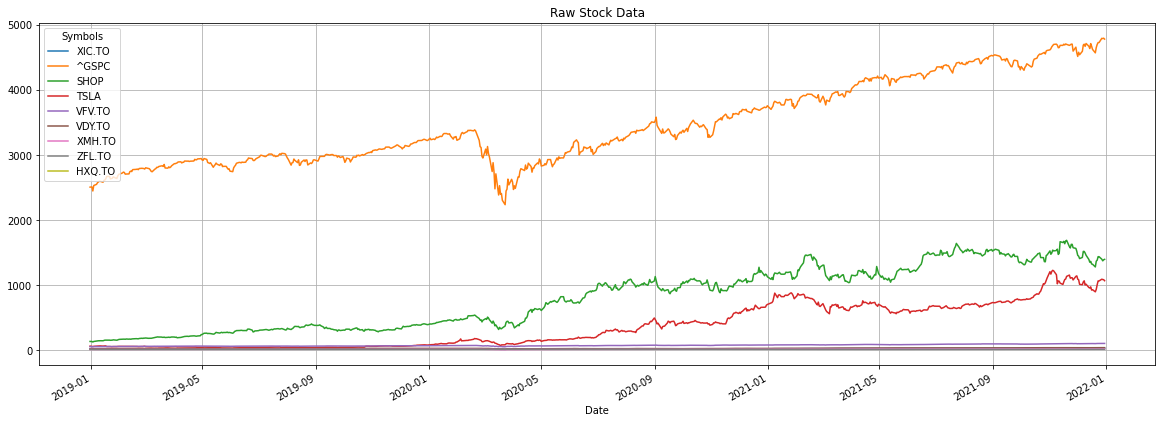

In [9]:
plot_that_chart(df_stocks, 'Raw Stock Data')

The chart is dominated by the Index, S&P 500. To get a clearer picture, the data will be normalized.

In [10]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,XMH.TO,ZFL.TO,HXQ.TO
Date,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2019-01-02,1.000439,1.001268,0.993861,0.931851,1.000496,1.007000,1.002500,1.009221,NaN
2019-01-03,0.990347,0.976480,0.937450,0.902524,0.967422,1.001334,0.993125,1.023054,NaN
2019-01-04,1.006582,1.010009,0.997183,0.954597,0.995369,1.015000,1.025000,1.011527,NaN
2019-01-07,1.011408,1.017089,1.042904,1.006490,0.994708,1.017667,1.035000,1.006917,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,1.621646,1.885151,10.396027,16.030650,1.854506,1.631114,1.675199,1.114672,NaN
2021-12-27,1.621646,1.911239,10.116215,16.435396,1.854506,1.631114,1.675199,1.114672,NaN
2021-12-28,1.621646,1.909308,9.935862,16.353215,1.854506,1.631114,1.675199,1.114672,NaN


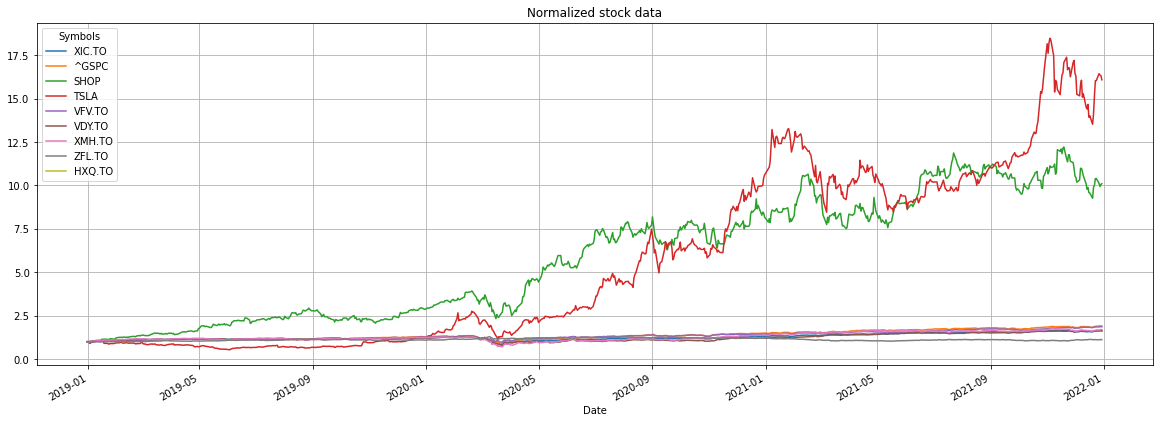

In [11]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

The above chart shows that Shopify and Tesla are the big winners over the observed time period. There are two major peaks, followed by drops. In order to see if the rest of the market followed the same trend these two dominating stocks and HXQ need to be removed.

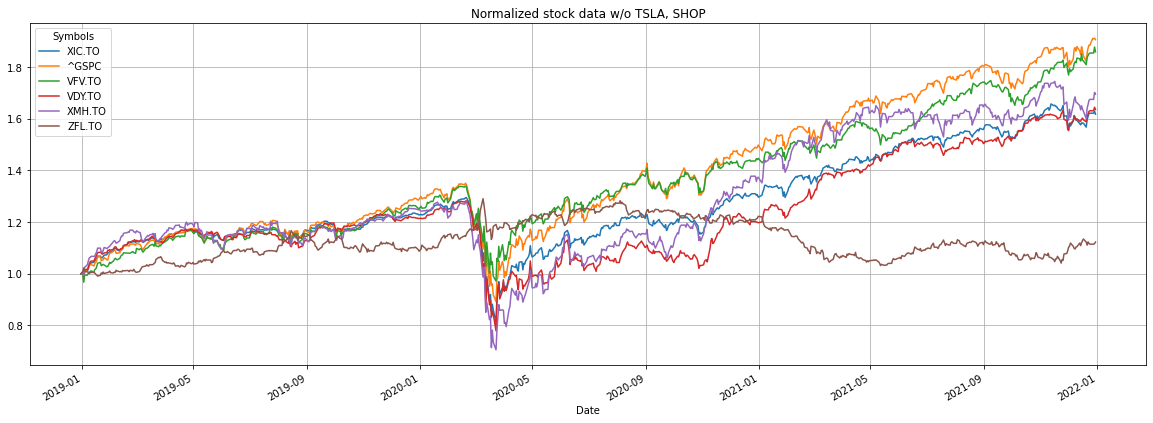

In [12]:
plot_that_chart(df_stocks_normalized.drop(['TSLA', 'SHOP', 'HXQ.TO'], axis=1), 'Normalized stock data w/o TSLA, SHOP')

Interestingly, we don't see the observed peaks and valleys of TSLA and SHOP in the rest of the listed shares. ZFL shows a trend that seems to be developing independent from the market. This may be the case because Real Estate is a completely diverent market sector. There is a major drop in April 2021.

### Correlations
We would like to see if daily returns of stocks correlate to each other.

In [61]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100
    #x = np.sum(np.log(df/df.shift()), axis=1)

    x.iloc[0] = 0

    return x

In [62]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,XMH.TO,ZFL.TO,HXQ.TO
Date,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2019-01-02,0.043871,0.126850,-0.613933,-6.814903,0.049599,0.700002,0.249997,0.922149,NaN
2019-01-03,-1.008761,-2.475673,-5.675881,-3.147168,-3.305797,-0.562700,-0.935165,1.370647,NaN
2019-01-04,1.639336,3.433571,6.371835,5.769742,2.888898,1.364823,3.209561,-1.126744,NaN
2019-01-07,0.479510,0.701043,4.584964,5.436115,-0.066448,0.262741,0.975611,-0.455782,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,0.058964,0.000000,0.000000,0.000000,0.139433,0.163017,0.231130,-0.223453,NaN
2021-12-27,0.000000,1.383894,-2.691529,2.524830,0.000000,0.000000,0.000000,0.000000,NaN
2021-12-28,0.000000,-0.101015,-1.782818,-0.500025,0.000000,0.000000,0.000000,0.000000,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

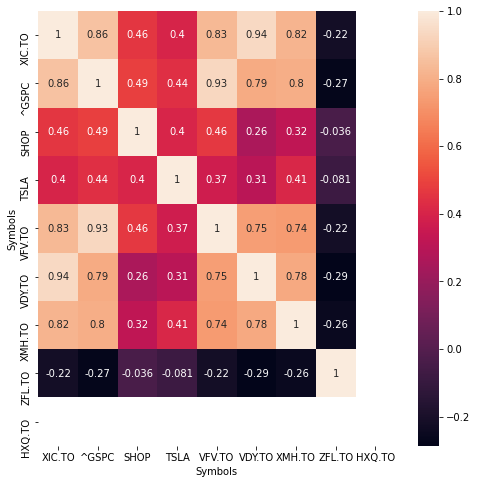

In [15]:
# Visualize correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df_stock_returns.corr(), annot=True)

The above chart confirms our observation of the trends. ZFL follows an independent path. SHOP and TSLA are also not highly correlated with the rest of the stocks and the market. A very high correlation exist between VFV and the S&P500 (^GSPC) which is no suprise as VFV is an ETF that tracks the S&P500. The highest correlation exist between VFV and XIC. Also this is no surprise as both track the index and compile only this top companies.

### EDA conclusions
- The trend is generally upwards with some peaks and valleys along the way
- ZFL (Real Estates) is very unrelated to the rest of the listed stocks
- TSLA and SHOP show very dynamic developments that separates them from the rest of the field
- There are times of steep falls for TSLA and SHOP, but in conclusion, these are the stocks with the highest gains in the obervation time period
- A strong correlations exist between the ETFs that track the index and the S&P500 (^GSPC)

## 4. Calculating the Sharpe Ratio

### Obtaining the risk free rate rf
Mostly, the rf rate is extracted from the [US government tresury bond](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=billratesAll).

The value can be calculated or looked up online, but I will take 0 for simplicity.

In [91]:
# 3 year treasury yield
rf = 0

This rf is already the yearly value. Our current data table contains the daily returns. We need to translate these to yearly values. There are 252 trading days in a year.

In [92]:
def sharpe_calculation(df, stock):
    '''Function to calculate the Sharpe Ratio
    Input: Range of a stock's daily returns
    Output: Sharpe Ratio'''

    sharpe_dly = (df[stock].mean() - rf) / df[stock].std()

    return np.sqrt(252) * sharpe_dly

In [93]:
# Let's test with TSLA
sharpe_calculation(df_stock_returns, 'TSLA')

1.7007325141532528

In [94]:
# OK, let's now calculate all
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Sharpe Ratio for {}: {:2.4}'.format(i, sharpe_calculation(df_stock_returns, i)))

Sharpe Ratio for XIC.TO: 0.89
Sharpe Ratio for SHOP: 1.692
Sharpe Ratio for TSLA: 1.701
Sharpe Ratio for VFV.TO: 1.101
Sharpe Ratio for VDY.TO: 0.7998
Sharpe Ratio for XMH.TO: 0.7835
Sharpe Ratio for ZFL.TO: 0.3876
Sharpe Ratio for HXQ.TO: nan
